In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pre-processing

In [3]:
df=pd.read_csv('IMDb Movies India.csv',encoding='latin-1')

In [4]:
df=df.iloc[:,:]

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.shape

(15509, 10)

In [7]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [8]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


### Year Column

#### Convert `Year` to datetime from object

we drop 1st row, as it has more NaN values

In [12]:
df=df.iloc[1:,:]

In [13]:
df.Year.unique()

array(['(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', nan, '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

As `Year` has parentheses we have to remove it

In [14]:
df.Year=df.Year.map(lambda x: x[1:-1],na_action='ignore')

In [15]:
df.Year.dtypes

dtype('O')

In [16]:
df.Year=pd.to_datetime(df.Year)

In [17]:
df.Year=df.Year.dt.year

### Vote Column

#### Conver Vote to numeric

In [18]:
df.Votes.unique()

array(['8', nan, '35', ..., '70,344', '408', '1,496'], dtype=object)

In [19]:
def change_dtypes_votes(x):
    if x:
        x=str(x)
        l=x.split(',')
        r=''.join(l)
        r=[i for i in r if i.isdigit()]
        r=''.join(r)
        
  
    return int(r)
    

In [20]:
change_dtypes_votes('2,44')

244

In [21]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [22]:
df.Votes=df.Votes.map(change_dtypes_votes,na_action='ignore')

In [23]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


### Duration

#### Convert Duration into numeric

 Verify, all values are in min or not

In [24]:
df.shape

(15508, 10)

In [25]:
df.Duration.str.contains('min').value_counts(dropna=False)

Duration
NaN     8268
True    7240
Name: count, dtype: int64

In [26]:
8268+7240

15508

Yes all values are in `min`

In [27]:
def duration_remove_min(x):
    if x:
        x=x.split()[0]
    return int(x)
    

In [28]:
duration_remove_min('180 min')

180

In [29]:
df.Duration=df.Duration.map(duration_remove_min,na_action='ignore')
df.rename(columns={'Duration':'Duration_in_min'},inplace=True)

In [30]:
df.head(2)

,Name,Year,Duration_in_min,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [31]:
df.dtypes

Name                object
Year               float64
Duration_in_min    float64
Genre               object
Rating             float64
Votes              float64
Director            object
Actor 1             object
Actor 2             object
Actor 3             object
dtype: object

# Analysis

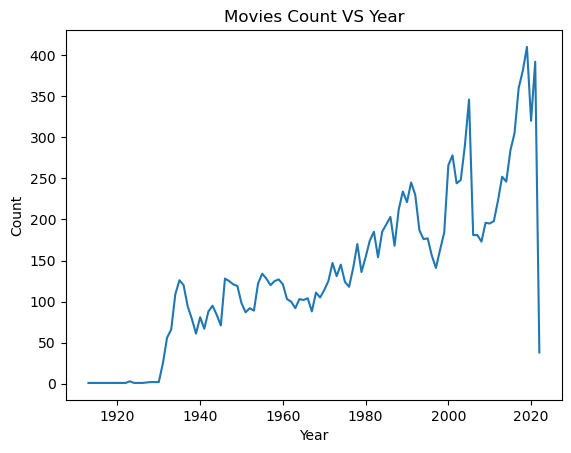

In [32]:
df.Year.value_counts().sort_index().plot()
plt.title('Movies Count VS Year')
plt.ylabel('Count')
plt.show()

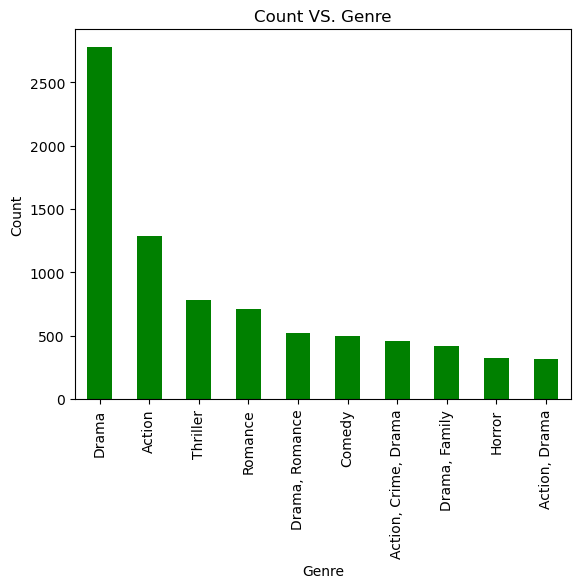

In [33]:
df.Genre.value_counts().head(10).plot(kind='bar',color='green')
plt.title('Count VS. Genre')
plt.ylabel('Count')
plt.show()


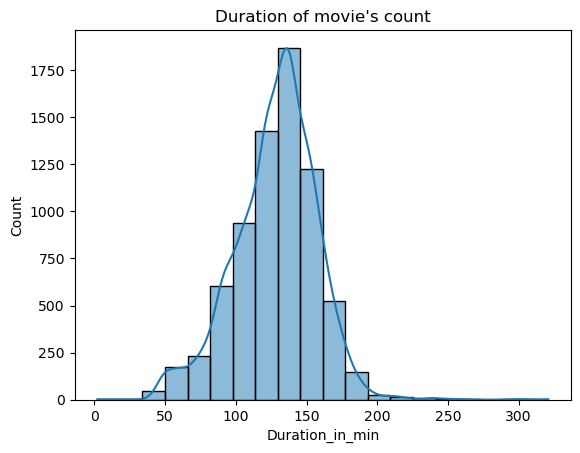

In [34]:
sns.histplot(data=df,x='Duration_in_min',bins=20,kde=True)
plt.title("Duration of movie's count")
plt.show()

# Cleaning and Transformation

In [35]:
inputs=df.copy()

Let select the Numeric and categorical columns

In [36]:
numeric_cols=inputs.select_dtypes(np.number).columns.tolist()
categorical_cols=inputs.select_dtypes('O').columns.tolist()

In [37]:
numeric_cols

['Year', 'Duration_in_min', 'Rating', 'Votes']

In [38]:
categorical_cols

['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

###  # Numeric Columns

In [39]:
inputs[numeric_cols].isna().sum()

Year                527
Duration_in_min    8268
Rating             7589
Votes              7588
dtype: int64

In [40]:
inputs[numeric_cols]=inputs[numeric_cols].mean()

In [41]:
inputs[numeric_cols].isna().sum()

Year               0
Duration_in_min    0
Rating             0
Votes              0
dtype: int64

### # Categorical Columns

In [42]:
inputs[categorical_cols].isna().sum()

Name           0
Genre       1877
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [43]:
inputs.dropna(inplace=True)

In [44]:
inputs.isna().sum()

Name               0
Year               0
Duration_in_min    0
Genre              0
Rating             0
Votes              0
Director           0
Actor 1            0
Actor 2            0
Actor 3            0
dtype: int64

In [45]:
target=inputs.Rating
inputs=inputs.drop('Rating',axis=1)


numeric_cols=inputs.select_dtypes(include='number').columns.tolist()
categorical_cols=inputs.select_dtypes(include='O').columns.tolist()

In [46]:
numeric_cols

['Year', 'Duration_in_min', 'Votes']

In [47]:
categorical_cols

['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

## Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()
scaler.fit(inputs[numeric_cols])

StandardScaler()

In [50]:
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])

In [51]:
inputs[numeric_cols].head(2)

,Year,Duration_in_min,Votes
1,0.0,0.0,-4.547474e-13
2,0.0,0.0,-4.547474e-13


## Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
for col in categorical_cols:
    encoder=LabelEncoder()
    inputs[col]=encoder.fit_transform(inputs[col])
    print(col,'is done')

Name is done
Genre is done
Director is done
Actor 1 is done
Actor 2 is done
Actor 3 is done


In [54]:
inputs[categorical_cols].head()

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
1,0,275,1218,2726,4239,514
2,1,326,4038,3091,2543,3265
3,2,221,2608,2422,1338,3813
4,6,275,313,2586,3079,394
5,7,190,2999,760,114,3631


In [55]:
X=inputs[numeric_cols+categorical_cols]
y=target

# Model Building

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,target,random_state=42,test_size=0.1)

In [57]:
X_train.shape,y_train.shape

((10230, 9), (10230,))

In [58]:
X_test.shape,y_test.shape

((1137, 9), (1137,))

In [59]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()